### 组合DataFrame——concat, join, merge
pandas的“撒手锏”

In [1]:
import pandas as pd

In [2]:
data=[[15, "France", 4.1, "Becky"],
      [44, "Canada", 6.1, "Leanne"]]
more_users = pd.DataFrame(data=data,
                          columns=["age", "country", "score", "name"],
                          index=[1000, 1011])
more_users

,age,country,score,name
1000,15,France,4.1,Becky
1011,44,Canada,6.1,Leanne


In [3]:
more_users.loc[:, 'continent'] = ['Europe', 'America']
more_users

,age,country,score,name,continent
1000,15,France,4.1,Becky,Europe
1011,44,Canada,6.1,Leanne,America


In [4]:
df = pd.read_excel('xl/course_participants.xlsx')
df

,user_id,name,age,country,score,continent
0,1001,Mark,55,Italy,4.5,Europe
1,1000,John,33,USA,6.7,America
2,1002,Tim,41,USA,3.9,America
3,1003,Jenny,12,Germany,9.0,Europe


In [5]:
df = df.reset_index().set_index('user_id')
df = df.drop(columns = 'index')

#### concat指令——连接（concatenation）
在默认情况下，concat 会将 DataFrame 按行粘合在一起，同时会将各列自动对齐。

In [6]:
pd.concat([df, more_users], axis=0)  # axis=0, 行粘贴，列元素自动对齐

,name,age,country,score,continent
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe
1000,Becky,15,France,4.1,Europe
1011,Leanne,44,Canada,6.1,America


In [7]:
data = [[3, 4],
        [5, 6]]
more_categories = pd.DataFrame(data=data,
                               columns=['quizzes', 'logins'],
                               index=[1000, 2000])
more_categories

,quizzes,logins
1000,3,4
2000,5,6


In [8]:
pd.concat([df, more_categories], axis=1)  # axis=1，列粘贴，行元素自动对齐

,name,age,country,score,continent,quizzes,logins
1001,Mark,55.0,Italy,4.5,Europe,NaN,NaN
1000,John,33.0,USA,6.7,America,3.0,4.0
1002,Tim,41.0,USA,3.9,America,NaN,NaN
1003,Jenny,12.0,Germany,9.0,Europe,NaN,NaN
2000,NaN,NaN,NaN,NaN,NaN,5.0,6.0


从上表中可以看到，只有index是1000数据被加进去了，2000没有对应的index，所以新加了一行。

同时，concat()指令可以接受两个以上的DataFrame数据

#### 连接和合并
pandas在join函数中会利用两个DataFrame的***索引***将***行***对齐。

join的方式有四种：**内连接、左连接、右连接、外连接**

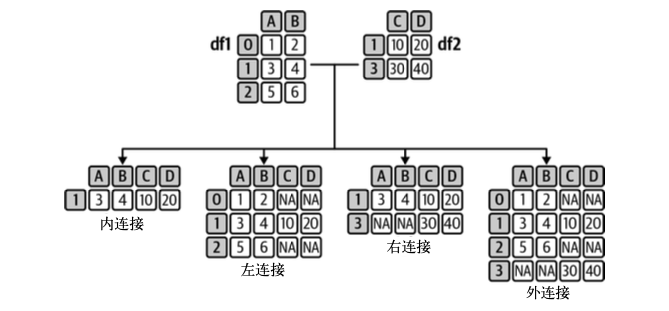

- 内连接：只包含两个 DataFrame 共有的索引
- 左连接：保留左端 df1 的所有行，然后用右端 df2 中的行去匹配 df1 的索引
- 右连接：保留 df2 中的所有行，然后用 df1 的行去匹配索引
- 外连接：其全称是完全外连接（full outer join） 。外连接会保留两个 DataFrame 的所有索引，然后再将值进行匹配

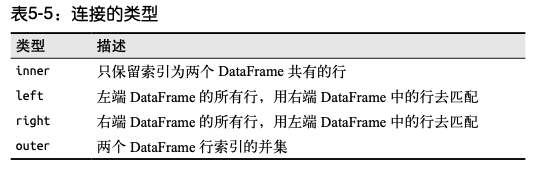


In [9]:
df1 = pd.DataFrame(data=[[1, 2], [3, 4], [5, 6]],
                   columns=["A", "B"])
df1

,A,B
0,1,2
1,3,4
2,5,6


In [10]:
df2 = pd.DataFrame(data=[[10, 20], [30, 40]],
                   columns=["C", "D"], index=[1, 3])
df2

,C,D
1,10,20
3,30,40


In [11]:
df1.join(df2, how='inner')

,A,B,C,D
1,3,4,10,20


In [12]:
df1.join(df2, how='left')

,A,B,C,D
0,1,2,NaN,NaN
1,3,4,10.0,20.0
2,5,6,NaN,NaN


In [13]:
df1.join(df2, how='right')

,A,B,C,D
1,3.0,4.0,10,20
3,NaN,NaN,30,40


In [14]:
df1.join(df2, how='outer')

,A,B,C,D
0,1.0,2.0,NaN,NaN
1,3.0,4.0,10.0,20.0
2,5.0,6.0,NaN,NaN
3,NaN,NaN,30.0,40.0


当不想依赖于索引的情况下连接DataFrame中的一列或多列，则应该使用merge。

merge可以通过on参数提供的一列或多列作为连接条件：这些列必须是两个DataFrame所共有的。

In [15]:
df1['category'] = ['a', 'b', 'c']
df2['category'] = ['c', 'd']
df1

,A,B,category
0,1,2,a
1,3,4,b
2,5,6,c


In [16]:
df2

,C,D,category
1,10,20,c
3,30,40,d


In [17]:
df1.merge(df2, how='inner', on=['category'])

,A,B,category,C,D
0,5,6,c,10,20


In [18]:
df1.merge(df2, how='left', on=['category'])

,A,B,category,C,D
0,1,2,a,NaN,NaN
1,3,4,b,NaN,NaN
2,5,6,c,10.0,20.0


### 描述性统计量
例如数据点数量，平均数、中位数、众数等。

In [19]:
rainfall = pd.DataFrame(data = [[300.1, 400.3, 1000.5],
                                [100.2, 300.4, 1100.6]],
                        columns = ['City 1', 'City 2', 'City 3'])
rainfall

,City 1,City 2,City 3
0,300.1,400.3,1000.5
1,100.2,300.4,1100.6


In [20]:
# 按列计算平均数
rainfall.mean()

City 1     200.15
City 2     350.35
City 3    1050.55
dtype: float64

In [21]:
# 按行计算平均数
rainfall.mean(axis=1)

0    566.966667
1    500.400000
dtype: float64

默认情况下，***缺失值***不会参与sum和mean计算

In [22]:
df

,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [23]:
df_multi = df.reset_index().set_index(['continent', 'country'])
df_multi = df_multi.sort_index()
df_multi

user_id   name  age  score
continent country                            
America   USA         1000   John   33    6.7
          USA         1002    Tim   41    3.9
Europe    Germany     1003  Jenny   12    9.0
          Italy       1001   Mark   55    4.5

In [24]:
df.columns.name = 'propertities'
df

propertities,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [25]:
t=df.loc[:, ['age', 'score', 'continent']].groupby(['continent']).mean()
t

propertities,age,score
continent,,
America,37.0,5.30
Europe,33.5,6.75


In [26]:
t.iloc[1,1]

6.75

### 透视表（pivo_table)

In [27]:
data = [["Oranges", "North", 12.30],
        ["Apples", "South", 10.55],
        ["Oranges", "South", 22.00],
        ["Bananas", "South", 5.90],
        ["Bananas", "North", 31.30],
        ["Oranges", "North", 13.10]]
sales = pd.DataFrame(data=data,
                     columns=["Fruit", "Region", "Revenue"])
sales

,Fruit,Region,Revenue
0,Oranges,North,12.30
1,Apples,South,10.55
2,Oranges,South,22.00
3,Bananas,South,5.90
4,Bananas,North,31.30
5,Oranges,North,13.10


In [28]:
pivot = pd.pivot_table(sales,
                       index='Fruit',
                       columns='Region',
                       values='Revenue',
                       aggfunc='sum',
                       margins=True,
                       margins_name='Total')
pivot

Region,North,South,Total
Fruit,,,
Apples,NaN,10.55,10.55
Bananas,31.3,5.90,37.20
Oranges,25.4,22.00,47.40
Total,56.7,38.45,95.15


透视数据意味着将**一列**（在本例中是 Region）中**不重复**的值转化为数据透视表中的**列标题**，然后再聚合**另一列中的值**

#### ?透视表的反操作——melt：将列标题转换成列的值?

In [29]:
pd.melt(pivot.iloc[:-1,:-1].reset_index(),
        id_vars='Fruit',
        value_vars=['North', 'South'],
        value_name='Revenue')

,Fruit,Region,Revenue
0,Apples,North,NaN
1,Bananas,North,31.30
2,Oranges,North,25.40
3,Apples,South,10.55
4,Bananas,South,5.90
5,Oranges,South,22.00


## 绘图Plotly
要在 Jupyter 笔记本中使用 Matplotlib，首先需要运行以下任意一条魔法指令

**魔法指令***是一系列可以让 Jupyter笔记本单元格表现为某种形式，或者让一些麻烦的任务变得简单起来的简单指令，这就像是魔法一样。*
*和 Python 代码一样，魔法指令也在单元格中编写，不过它们要么以 %% 开头，要么以 % 开头。作用于整个单元格的指令以 %% 开头，而只作用于一行的指令以 % 开头。通过%magic可以查看所有的魔法指令*

%matplotlib inline 或者 %matplotlib notebook（后者更有交互性，可以修改图表的大小和缩放级别）

In [30]:
import numpy as np
%matplotlib inline

In [31]:
data = pd.DataFrame(data=np.random.rand(4,4) * 100000,
                    index=['Q1', 'Q2', 'Q3', 'Q4'],
                    columns=['East', 'West', 'North', 'South'])
data.index.name = 'Quarters'
data.columns.name = 'Region'
data

Region,East,West,North,South
Quarters,,,,
Q1,98001.557932,40130.911339,38435.854369,87286.296288
Q2,52770.848209,48036.881308,53929.071049,87209.182309
Q3,97234.010275,52226.570158,16595.584603,11745.498017
Q4,86673.824844,69376.838000,13613.334074,54446.990489


<Axes: xlabel='Quarters'>

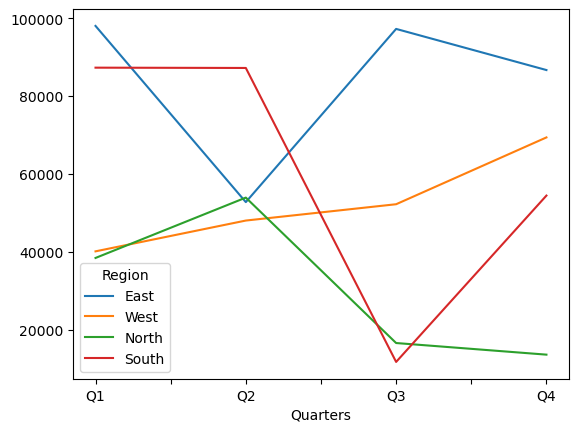

In [32]:
data.plot()

#### 使用Plotly提高pandas绘图的交互性
naconda 中并未包含 Plotly，如果你没有安装过 Plotly，可以用下面的命令进行安装：

(base)> conda install plotly

In [35]:
pd.options.plotting.backend = 'plotly'

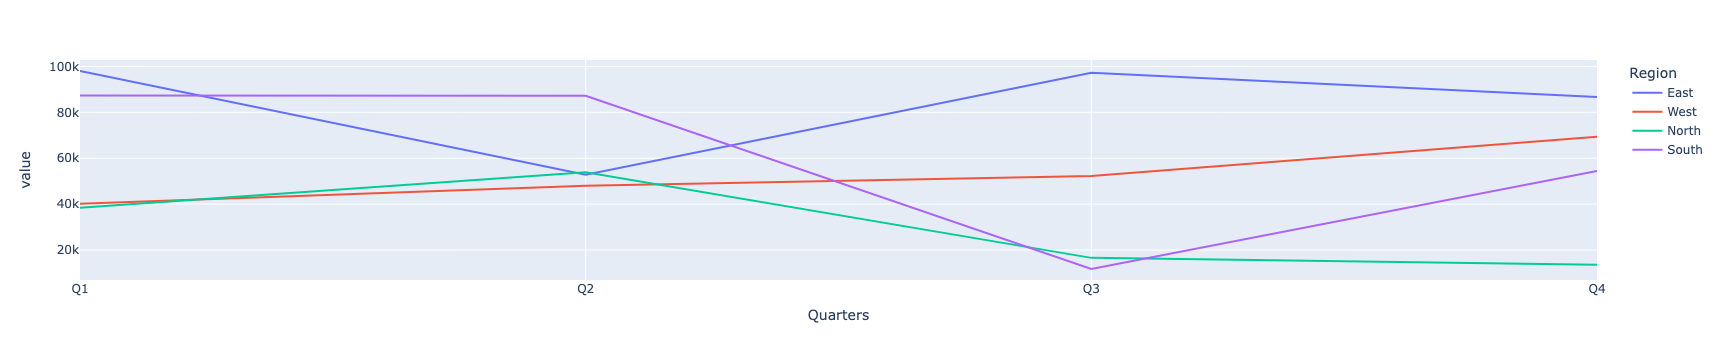

In [36]:
data.plot()

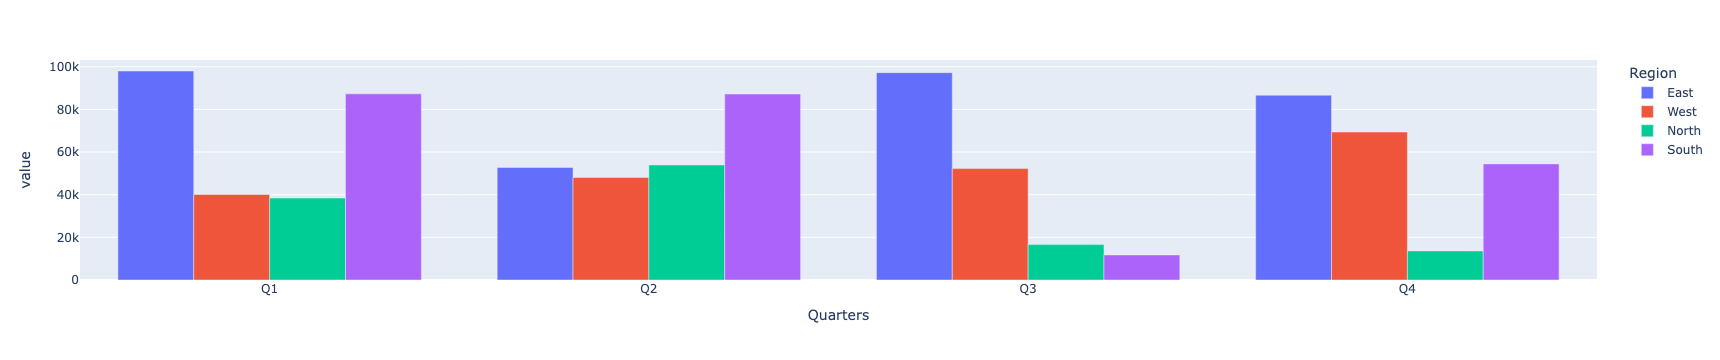

In [37]:
data.plot.bar(barmode='group')

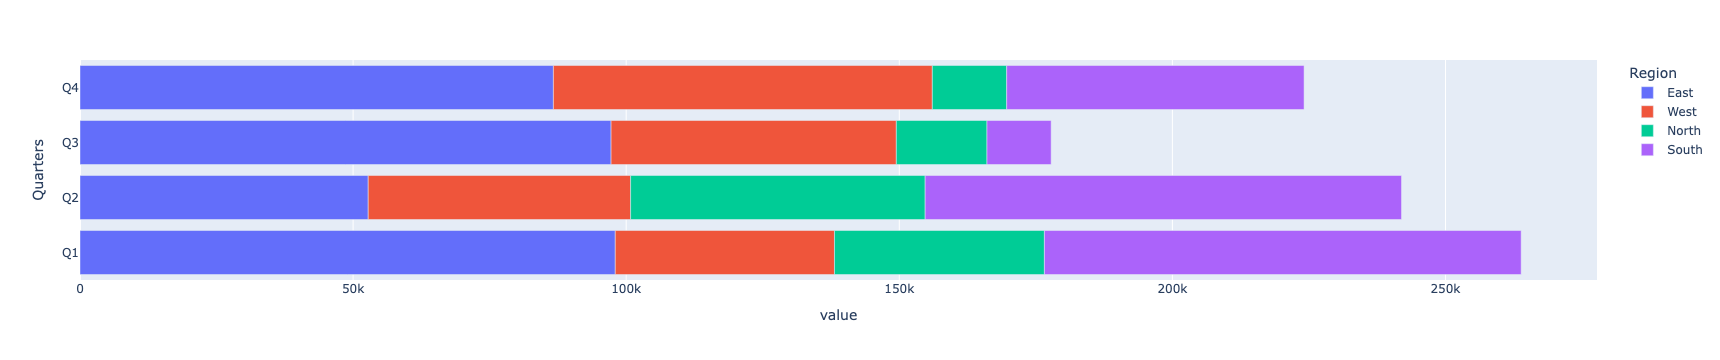

In [38]:
data.plot.barh()

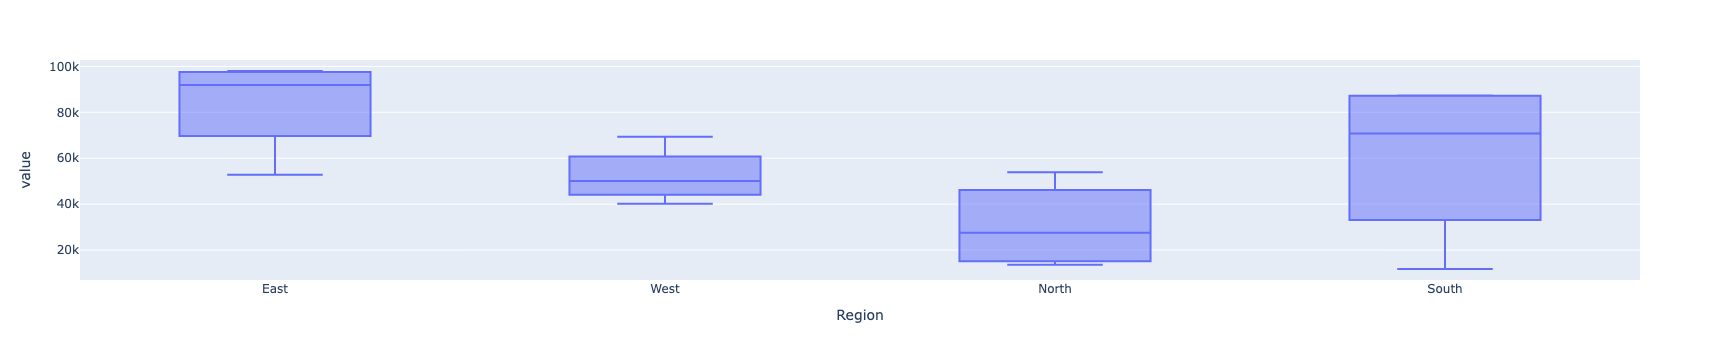

In [39]:
data.plot.box()